<a href="https://colab.research.google.com/github/naenumtou/statisticalModel/blob/main/optimumBinning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install binning library
!pip install optbinning --upgrade

In [ ]:
# Import libraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from optbinning import BinningProcess

# Change working directory
%cd /content/drive/My Drive/Colab Notebooks/scoreData

# Config display
%config InlineBackend.figure_format = 'retina'

/content/drive/My Drive/Colab Notebooks/scoreData


In [ ]:
# Import data
df = pd.read_parquet('appData.parquet', engine = 'pyarrow')
df.isnull().sum()

id                                   0
loan_amnt                            0
term                                 0
int_rate                             0
installment                          0
grade                                0
emp_length                      146907
home_ownership                       0
annual_inc                           0
verification_status                  0
purpose                              0
addr_state                           0
delinq_2yrs                          0
fico_range_low                       0
fico_range_high                      0
inq_last_6mths                       0
mths_since_last_delinq         1158502
open_acc                             0
total_acc                            0
total_pymnt                          0
last_pymnt_amnt                      0
mths_since_last_major_derog    1679893
application_type                     0
default                              0
mths_since_issue_d                   0
mths_since_last_pymnt_d  

In [ ]:
# Features and target seperated
X = df.drop(['id', 'default'], axis = 1)
y = df['default']

In [ ]:
# Define parameters
catsFeature = ['grade',
               'home_ownership',
               'verification_status',
               'purpose',
               'addr_state',
               'delinq_2yrs',
               'inq_last_6mths',
               'application_type',
               'mths_since_last_delinq',
               'mths_since_last_major_derog',
               'mths_since_issue_d',
               'mths_since_last_pymnt_d']

# Selection factor
selectionCriteria = {'iv': {'min': 0.05,
                            'strategy': 'highest',
                            'top': 9}}

# Binning process
binningProcess = BinningProcess(list(X.columns),
                                categorical_variables = catsFeature,
                                selection_criteria = selectionCriteria,
                                n_jobs = -1)

In [ ]:
# Fitting binning
binningProcess.fit(X, y)

BinningProcess(binning_fit_params=None, binning_transform_params=None,
               categorical_variables=['grade', 'home_ownership',
                                      'verification_status', 'purpose',
                                      'addr_state', 'delinq_2yrs',
                                      'inq_last_6mths', 'application_type',
                                      'mths_since_last_delinq',
                                      'mths_since_last_major_derog',
                                      'mths_since_issue_d',
                                      'mths_since_last_pymnt_d'],
               max_bin_size=None, max_n_bins=None, m...
                               'grade', 'emp_length', 'home_ownership',
                               'annual_inc', 'verification_status', 'purpose',
                               'addr_state', 'delinq_2yrs', 'fico_range_low',
                               'fico_range_high', 'inq_last_6mths',
                               'mths_

In [ ]:
# Summary table
binningSummary = binningProcess.summary()
binningSummary = binningSummary.sort_values(by = ['iv'], ascending = False)
binningSummary

,name,dtype,status,selected,n_bins,iv,js,gini,quality_score
19,last_pymnt_amnt,numerical,OPTIMAL,True,13,1.87424,0.134456,0.406637,9.62083e-06
23,mths_since_last_pymnt_d,categorical,OPTIMAL,True,9,1.52548,0.154713,0.49088,0.00323182
4,grade,categorical,OPTIMAL,True,5,0.473284,0.0561645,0.362843,0.862833
2,int_rate,numerical,OPTIMAL,True,12,0.461635,0.0542858,0.360197,0.953042
22,mths_since_issue_d,categorical,OPTIMAL,True,14,0.447143,0.0488465,0.285884,0.752098
18,total_pymnt,numerical,OPTIMAL,True,9,0.272184,0.0321392,0.249283,0.829551
13,fico_range_high,numerical,OPTIMAL,True,14,0.159296,0.0194764,0.212575,0.603921
12,fico_range_low,numerical,OPTIMAL,True,14,0.159296,0.0194764,0.212575,0.603921
8,verification_status,categorical,OPTIMAL,True,3,0.0834679,0.0103699,0.153474,0.280663
1,term,numerical,OPTIMAL,False,2,0.0665964,0.00828955,0.121103,0.149561


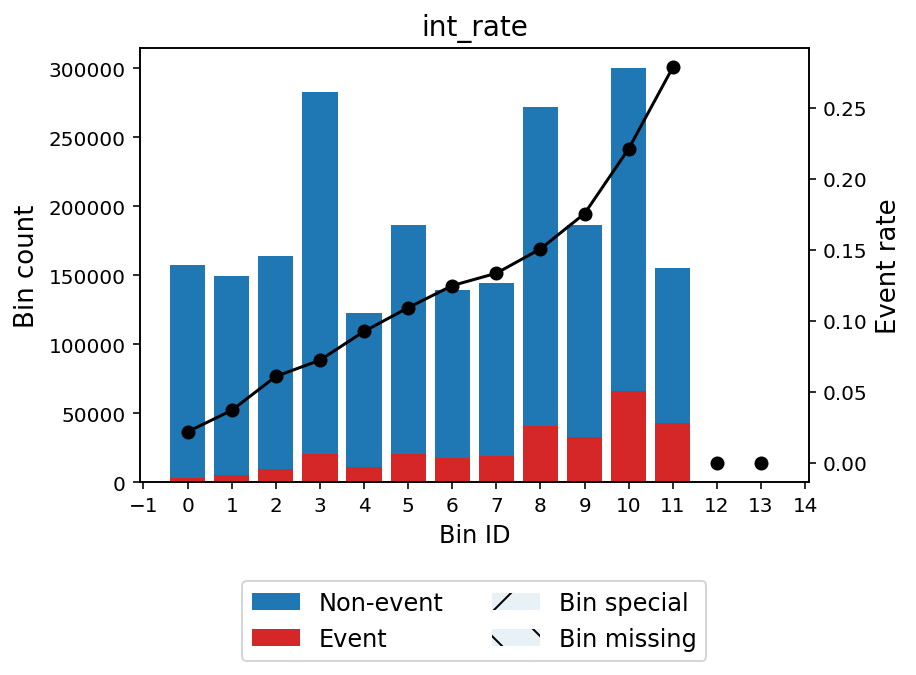

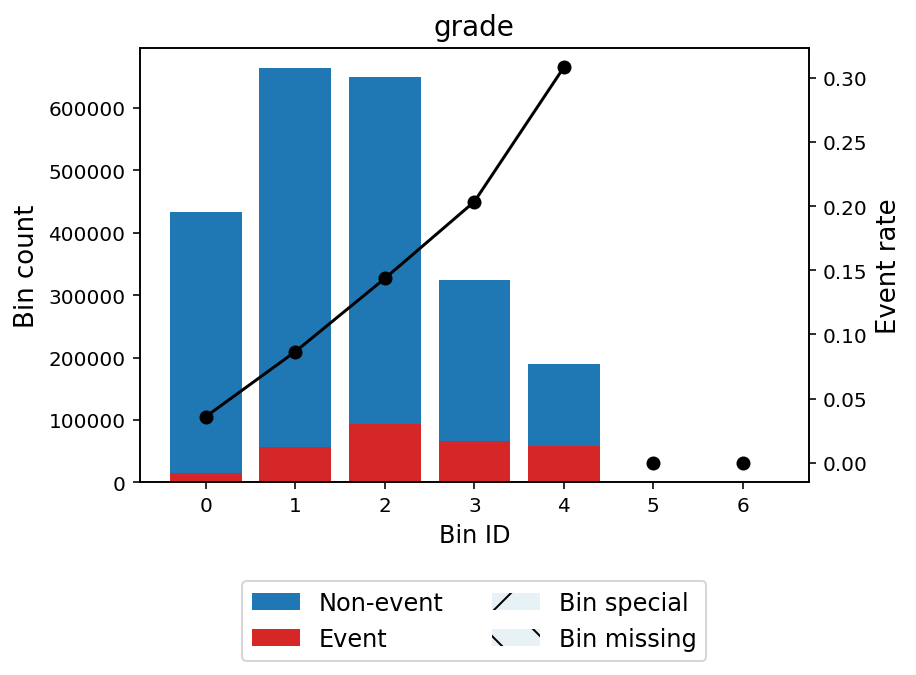

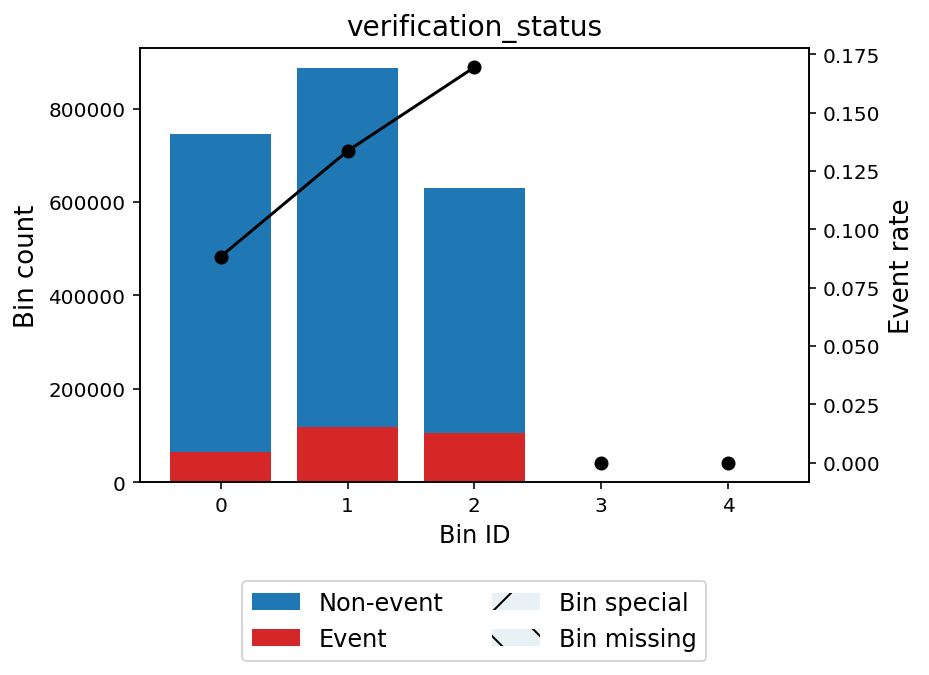

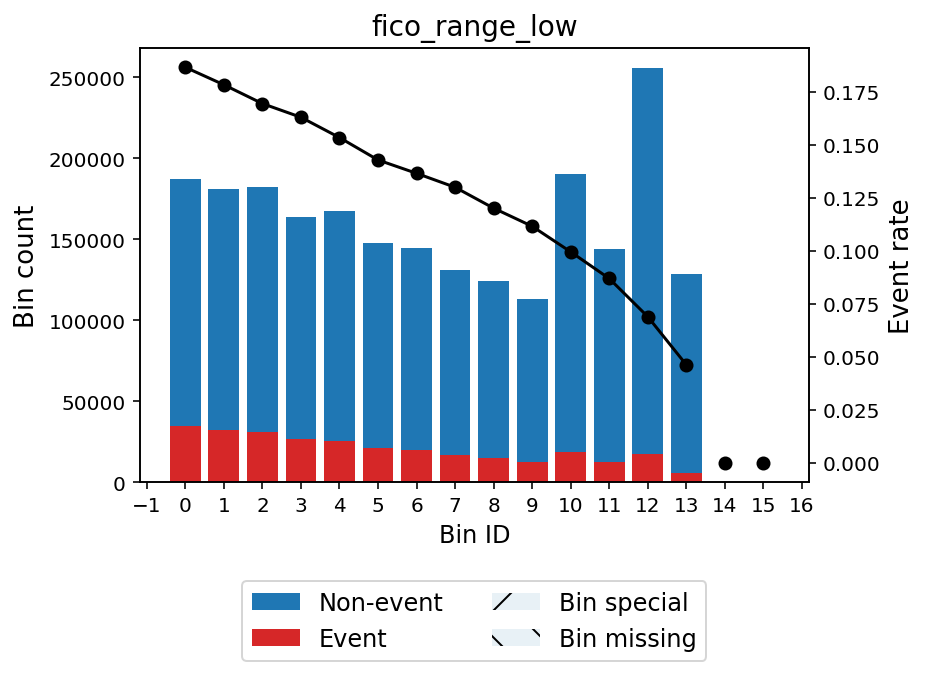

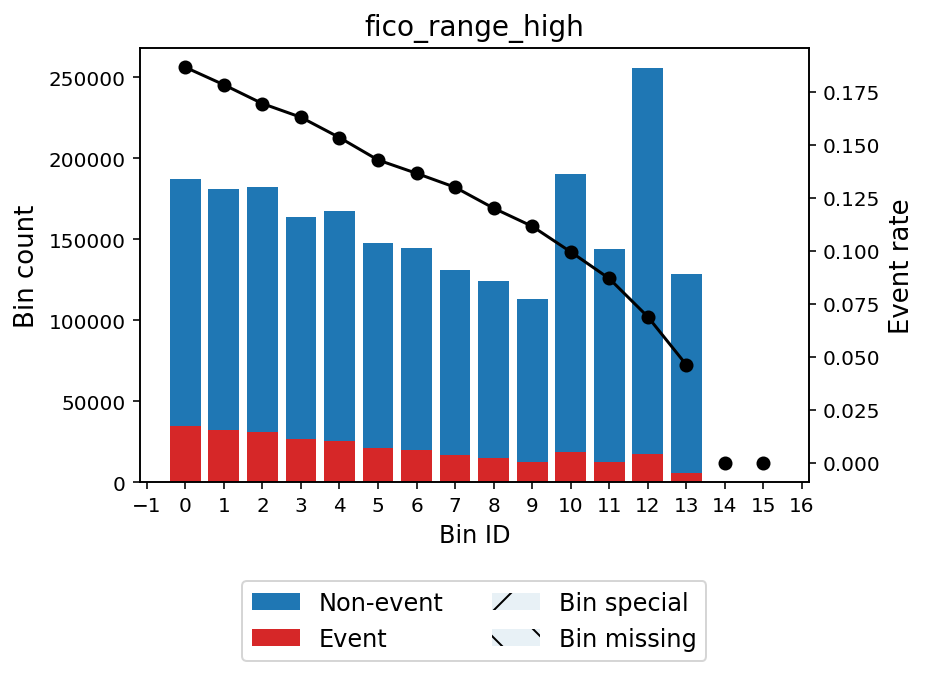

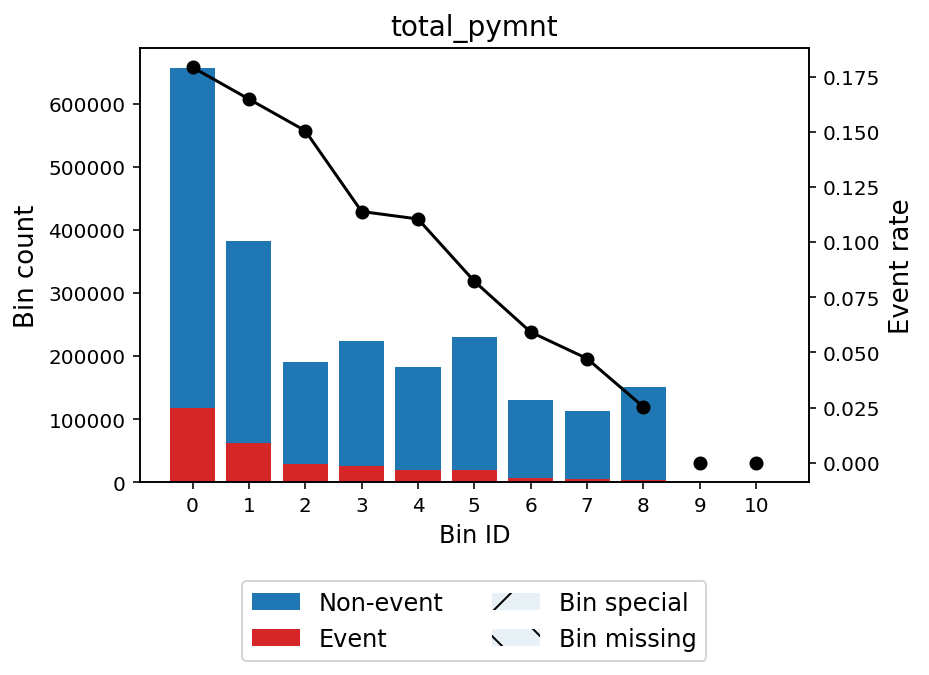

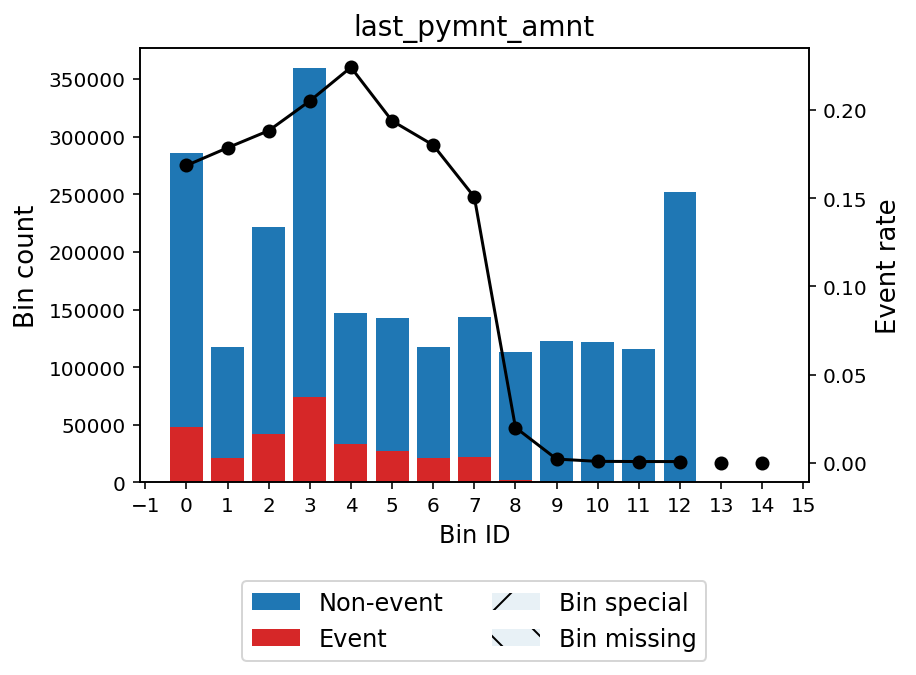

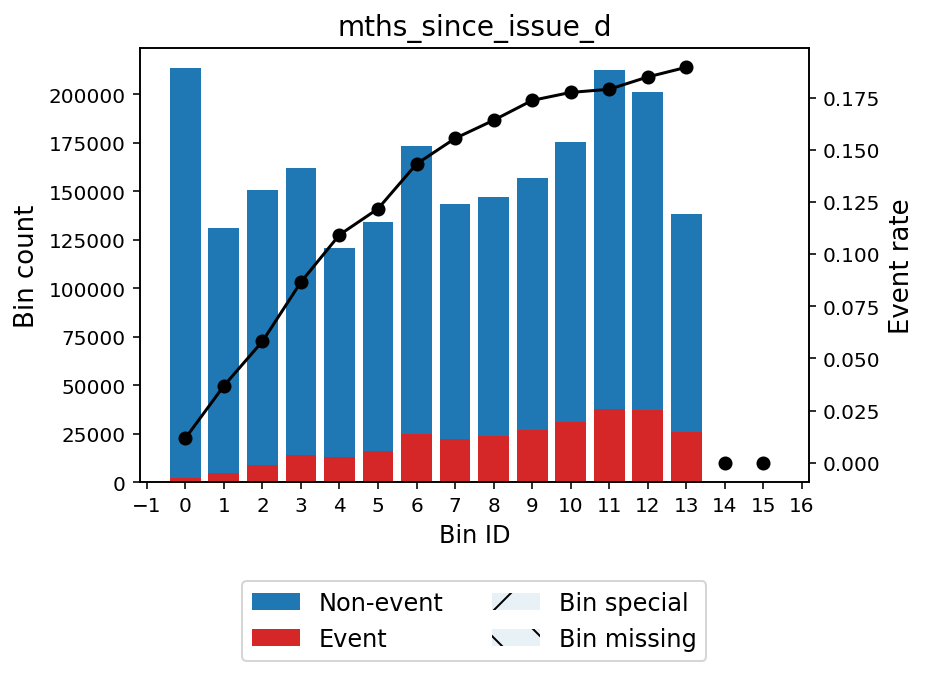

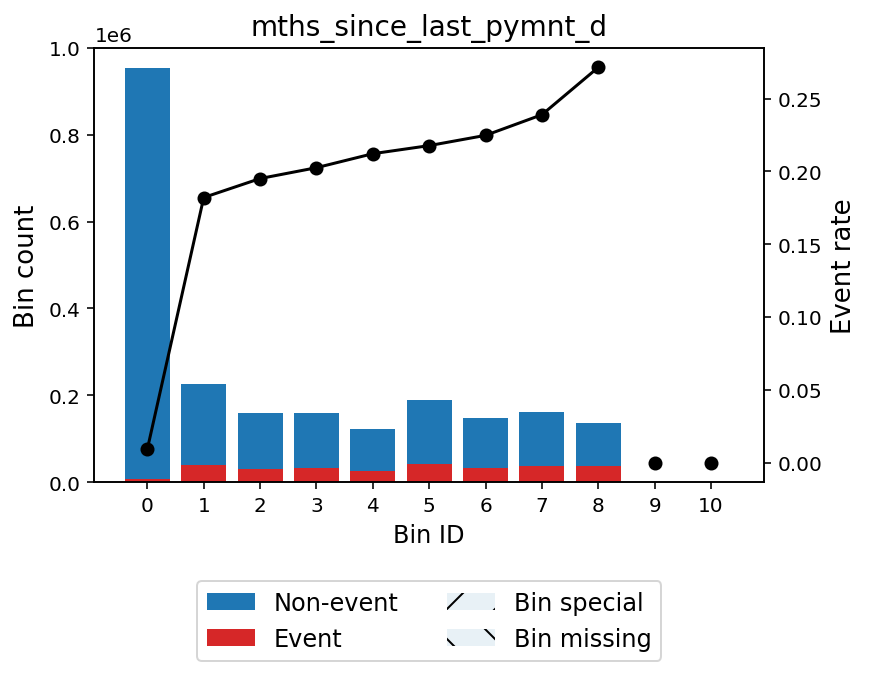

,Factor,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,int_rate,"[-inf, 6.86)",157535,0.069685,154109,3426,0.021748,1.89329,0.125817,0.013732
1,int_rate,"[6.86, 7.86)",149697,0.066218,144187,5510,0.036808,1.35157,0.073324,0.008526
2,int_rate,"[7.86, 8.85)",163760,0.072439,153817,9943,0.060717,0.825915,0.036255,0.004407
3,int_rate,"[8.85, 10.73)",282746,0.125072,262337,20409,0.072181,0.640674,0.040363,0.004961
4,int_rate,"[10.73, 11.40)",122939,0.054382,111578,11361,0.092412,0.371558,0.006532,0.000812
...,...,...,...,...,...,...,...,...,...,...
6,mths_since_last_pymnt_d,"[46.0, 81.0, 132.0, 75.0, 42.0, 44.0, 64.0, 66...",148904,0.065867,115440,33464,0.224735,-0.674699,0.038094,0.004673
7,mths_since_last_pymnt_d,"[97.0, 101.0, 78.0, 109.0, 86.0, 58.0, 74.0, 1...",162205,0.071751,123452,38753,0.238914,-0.754335,0.053241,0.006502
8,mths_since_last_pymnt_d,"[100.0, 57.0, 55.0, 52.0, 54.0, 126.0, 56.0, 1...",137396,0.060777,100099,37297,0.271456,-0.925733,0.071678,0.008653
9,mths_since_last_pymnt_d,Special,0,0.000000,0,0,0.000000,0,0.000000,0.000000


In [ ]:
# Details of factor
factors = binningProcess.get_support(names = True)
WOESummary = []

for factor in factors:
  
  # Build table
  build = binningProcess.get_binned_variable(factor)

  # WOE
  WOETable = build.binning_table.build()
  WOETable['Factor'] = factor
  WOETable = WOETable.drop(WOETable.tail(1).index) #Drop total row
  WOESummary.append(WOETable)

  # Plot
  build.binning_table.plot(metric = 'event_rate')

WOESummary = pd.concat(WOESummary, axis = 0)

# Reorder columns
cols = WOESummary.columns
cols = cols[-1:].append(cols[:-1])
WOESummary = WOESummary[cols]
WOESummary

In [ ]:
# Sample factor
WOESummary[WOESummary['Factor'] == 'grade']

,Factor,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,grade,[A],433027,0.191548,417491,15536,0.035878,1.37812,0.218462,0.025333
1,grade,[B],663557,0.293523,606108,57449,0.086577,0.443181,0.048820,0.006053
2,grade,[C],650053,0.287549,556694,93359,0.143618,-0.127416,0.004893,0.000611
3,grade,[D],324424,0.143508,258399,66025,0.203515,-0.548508,0.052573,0.006490
4,grade,"[E, F, G]",189607,0.083872,131149,58458,0.308311,-1.10495,0.148536,0.017677
5,grade,Special,0,0.000000,0,0,0.000000,0,0.000000,0.000000
6,grade,Missing,0,0.000000,0,0,0.000000,0,0.000000,0.000000


In [ ]:
# Sample factor
WOESummary[WOESummary['Factor'] == 'last_pymnt_amnt']

,Factor,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,last_pymnt_amnt,"[-inf, 196.35)",285710,0.126383,237554,48156,0.168549,-0.31703,0.014262,0.001775
1,last_pymnt_amnt,"[196.35, 249.28)",117374,0.051920,96413,20961,0.178583,-0.387002,0.008951,0.001112
2,last_pymnt_amnt,"[249.28, 327.70)",221967,0.098186,180173,41794,0.188289,-0.451815,0.023604,0.002926
3,last_pymnt_amnt,"[327.70, 498.11)",359303,0.158937,285596,73707,0.205139,-0.558499,0.060572,0.007475
4,last_pymnt_amnt,"[498.11, 602.09)",147208,0.065117,114199,33009,0.224234,-0.671817,0.037304,0.004577
5,last_pymnt_amnt,"[602.09, 734.90)",142242,0.062920,114668,27574,0.193853,-0.487812,0.017854,0.002210
6,last_pymnt_amnt,"[734.90, 902.07)",117483,0.051968,96322,21161,0.180120,-0.397443,0.009484,0.001178
7,last_pymnt_amnt,"[902.07, 1407.02)",143599,0.063521,121965,21634,0.150656,-0.183512,0.002289,0.000286
8,last_pymnt_amnt,"[1407.02, 3001.08)",113516,0.050213,111254,2262,0.019927,1.98259,0.096554,0.010414
9,last_pymnt_amnt,"[3001.08, 5005.85)",122585,0.054225,122336,249,0.002031,4.28409,0.262394,0.019556


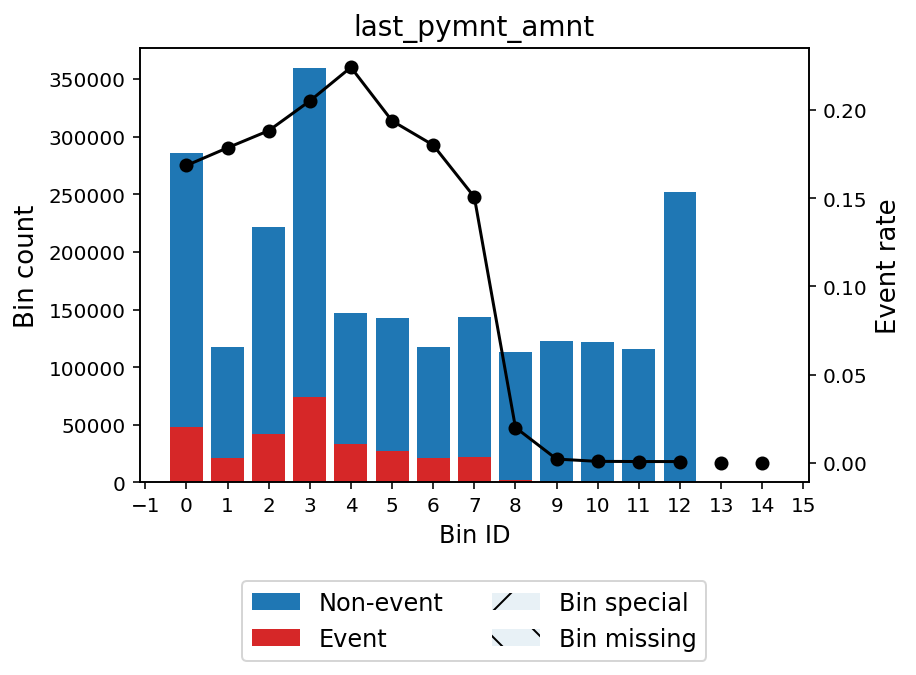

In [ ]:
# Get factor details 'last_pymnt_amnt'
factorSample = binningProcess.get_binned_variable('last_pymnt_amnt')
factorSample.binning_table.plot(metric = 'event_rate')

In [ ]:
# Re-binning with trend
XSelected = X[factors] #Used only factors passed IV

# Define parameters
# Categorical features
catsFeature = ['term',
               'grade',
               'verification_status',
               'mths_since_issue_d',
               'mths_since_last_pymnt_d']

# Trend features
trendFeature = {'grade': {'monotonic_trend': 'ascending'},
                'fico_range_low': {'monotonic_trend': 'descending'},
                'fico_range_high': {'monotonic_trend': 'descending'},
                'total_pymnt': {'monotonic_trend': 'descending'},
                'last_pymnt_amnt': {'monotonic_trend': 'descending'},
                'mths_since_issue_d': {'monotonic_trend': 'ascending'},
                'mths_since_last_pymnt_d': {'monotonic_trend': 'ascending'}}

# Binning process
binningProcess = BinningProcess(list(XSelected.columns),
                                categorical_variables = catsFeature,
                                binning_fit_params = trendFeature,
                                n_jobs = -1)

# Fitting binning
binningProcess.fit(XSelected, y)

BinningProcess(binning_fit_params={'fico_range_high': {'monotonic_trend': 'descending'},
                                   'fico_range_low': {'monotonic_trend': 'descending'},
                                   'grade': {'monotonic_trend': 'ascending'},
                                   'last_pymnt_amnt': {'monotonic_trend': 'descending'},
                                   'mths_since_issue_d': {'monotonic_trend': 'ascending'},
                                   'mths_since_last_pymnt_d': {'monotonic_trend': 'ascending'},
                                   'total_pymnt...
               max_pvalue=None, max_pvalue_policy='consecutive',
               min_bin_size=None, min_n_bins=None, min_prebin_size=0.05,
               n_jobs=-1, selection_criteria=None, special_codes=None,
               split_digits=None,
               variable_names=['int_rate', 'grade', 'verification_status',
                               'fico_range_low', 'fico_range_high',
                               '

In [ ]:
# Summary table
binningSummary = binningProcess.summary()
binningSummary = binningSummary.sort_values(by = ['iv'], ascending = False)
binningSummary

,name,dtype,status,selected,n_bins,iv,js,gini,quality_score
6,last_pymnt_amnt,numerical,OPTIMAL,True,8,1.86546,0.13342,0.377193,7.92269e-06
8,mths_since_last_pymnt_d,categorical,OPTIMAL,True,9,1.52548,0.154713,0.49088,0.00323182
1,grade,categorical,OPTIMAL,True,5,0.473284,0.0561645,0.362843,0.862833
0,int_rate,numerical,OPTIMAL,True,12,0.461635,0.0542858,0.360197,0.953042
7,mths_since_issue_d,categorical,OPTIMAL,True,14,0.447143,0.0488465,0.285884,0.752098
5,total_pymnt,numerical,OPTIMAL,True,9,0.272184,0.0321392,0.249283,0.829551
3,fico_range_low,numerical,OPTIMAL,True,14,0.159296,0.0194764,0.212575,0.603921
4,fico_range_high,numerical,OPTIMAL,True,14,0.159296,0.0194764,0.212575,0.603921
2,verification_status,categorical,OPTIMAL,True,3,0.0834679,0.0103699,0.153474,0.280663


In [ ]:
# Get factor details 'last_pymnt_amnt'
factorSample = binningProcess.get_binned_variable('last_pymnt_amnt')
factorSample.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[-inf, 734.90)",1273804,0.563464,1028603,245201,0.192495,-0.479101,0.153763,0.019039
1,"[734.90, 902.07)",117483,0.051968,96322,21161,0.180120,-0.397443,0.009484,0.001178
2,"[902.07, 1407.02)",143599,0.063521,121965,21634,0.150656,-0.183512,0.002289,0.000286
3,"[1407.02, 3001.08)",113516,0.050213,111254,2262,0.019927,1.98259,0.096554,0.010414
4,"[3001.08, 5005.85)",122585,0.054225,122336,249,0.002031,4.28409,0.262394,0.019556
5,"[5005.85, 7523.04)",121698,0.053833,121609,89,0.000731,5.30695,0.326003,0.020537
6,"[7523.04, 10617.49)",115682,0.051172,115608,74,0.000640,5.44092,0.317937,0.019609
7,"[10617.49, inf)",252301,0.111605,252144,157,0.000622,5.46853,0.697032,0.042803
8,Special,0,0.000000,0,0,0.000000,0,0.000000,0.000000
9,Missing,0,0.000000,0,0,0.000000,0,0.000000,0.000000


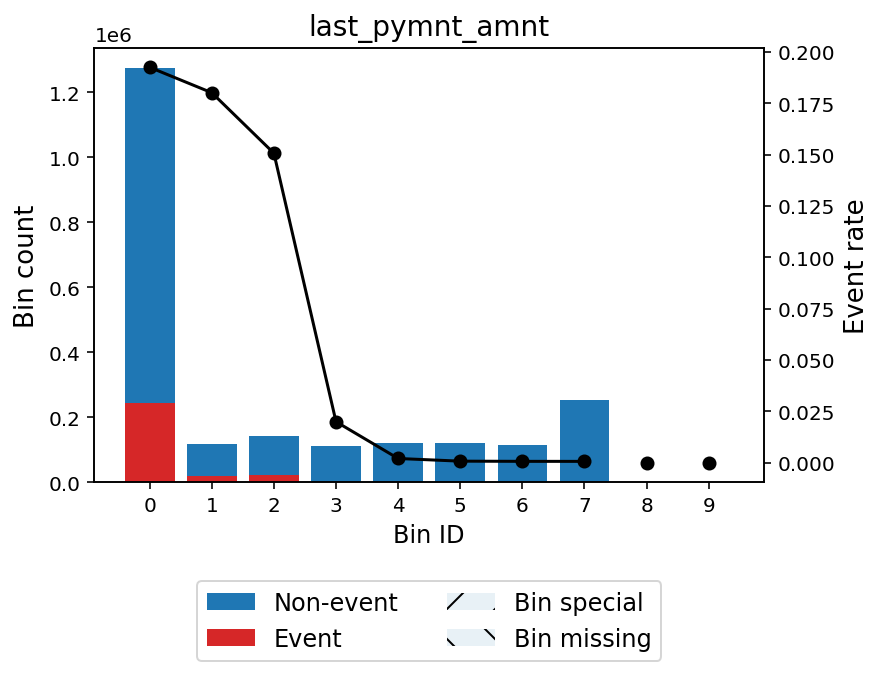

In [ ]:
# Plot factor details 'last_pymnt_amnt'
factorSample.binning_table.plot(metric = 'event_rate')

In [ ]:
# Transforme table
XWOE = binningProcess.transform(XSelected, metric = 'woe')
XWOE

,int_rate,grade,verification_status,fico_range_low,fico_range_high,total_pymnt,last_pymnt_amnt,mths_since_issue_d,mths_since_last_pymnt_d
0,-0.182348,-0.127416,0.421481,-0.276744,-0.276744,-0.391175,-0.479101,-0.460142,-0.633845
1,0.186994,-0.127416,0.421481,0.289935,0.289935,1.092482,-0.183512,-0.460142,-0.925733
2,0.371558,0.443181,0.421481,-0.011593,-0.011593,0.853061,5.468530,-0.460142,-0.674699
3,-0.182348,-0.127416,-0.043274,1.113784,1.113784,1.738960,-0.397443,-0.460142,2.744344
4,-0.960373,-1.104954,-0.043274,-0.011593,-0.011593,0.139153,5.440916,-0.460142,-0.925733
...,...,...,...,...,...,...,...,...,...
2260663,0.035918,-0.127416,-0.043274,-0.385173,-0.385173,0.173151,-0.479101,-0.124290,2.744344
2260664,0.640674,0.443181,0.421481,-0.011593,-0.011593,0.173151,-0.479101,-0.124290,2.744344
2260665,0.640674,0.443181,-0.323269,0.161973,0.161973,1.092482,-0.397443,-0.124290,2.744344
2260666,-0.182348,-0.127416,0.421481,-0.440475,-0.440475,-0.290099,-0.479101,-0.124290,-0.600923


In [ ]:
# Transforme table bins
XBins = binningProcess.transform(XSelected, metric = 'bins')
XBins

,int_rate,grade,verification_status,fico_range_low,fico_range_high,total_pymnt,last_pymnt_amnt,mths_since_issue_d,mths_since_last_pymnt_d
0,"[13.63, 15.12)",['C'],['Not Verified'],"[672.50, 677.50)","[676.50, 681.50)","[-inf, 5254.24)","[-inf, 734.90)",[ 69. 104. 62. 68. 110. 71. 156. 151. 153. ...,[ 43. 67. 80. 25. 59. 79. 94. 102. 38. ...
1,"[11.40, 12.15)",['C'],['Not Verified'],"[707.50, 717.50)","[711.50, 721.50)","[24845.02, 30221.66)","[902.07, 1407.02)",[ 69. 104. 62. 68. 110. 71. 156. 151. 153. ...,[100. 57. 55. 52. 54. 126. 56. 157. 89. ...
2,"[10.73, 11.40)",['B'],['Not Verified'],"[692.50, 697.50)","[696.50, 701.50)","[20939.35, 24845.02)","[10617.49, inf)",[ 69. 104. 62. 68. 110. 71. 156. 151. 153. ...,[ 46. 81. 132. 75. 42. 44. 64. 66. 76. ...
3,"[13.63, 15.12)",['C'],['Source Verified'],"[762.50, inf)","[766.50, inf)","[30221.66, inf)","[734.90, 902.07)",[ 69. 104. 62. 68. 110. 71. 156. 151. 153. ...,[23. 24.]
4,"[20.89, inf)",['E' 'F' 'G'],['Source Verified'],"[692.50, 697.50)","[696.50, 701.50)","[10443.40, 12970.69)","[7523.04, 10617.49)",[ 69. 104. 62. 68. 110. 71. 156. 151. 153. ...,[100. 57. 55. 52. 54. 126. 56. 157. 89. ...
...,...,...,...,...,...,...,...,...,...
2260663,"[12.15, 12.98)",['C'],['Source Verified'],"[662.50, 667.50)","[666.50, 671.50)","[12970.69, 15962.15)","[-inf, 734.90)",[137. 120. 127. 49. 121. 144. 133. 114. 139. ...,[23. 24.]
2260664,"[8.85, 10.73)",['B'],['Not Verified'],"[692.50, 697.50)","[696.50, 701.50)","[12970.69, 15962.15)","[-inf, 734.90)",[137. 120. 127. 49. 121. 144. 133. 114. 139. ...,[23. 24.]
2260665,"[8.85, 10.73)",['B'],['Verified'],"[702.50, 707.50)","[706.50, 711.50)","[24845.02, 30221.66)","[734.90, 902.07)",[137. 120. 127. 49. 121. 144. 133. 114. 139. ...,[23. 24.]
2260666,"[13.63, 15.12)",['C'],['Not Verified'],"[-inf, 662.50)","[-inf, 666.50)","[5254.24, 8422.95)","[-inf, 734.90)",[137. 120. 127. 49. 121. 144. 133. 114. 139. ...,[116. 111. 63. 40. 61. 117. 93. 47. 69. ...
